In [1]:
import cantera as ct
import numpy as np
import pandas as pd

print(f"Running Cantera Version: {ct.__version__}")

Running Cantera Version: 3.0.0


In [2]:
# Import plotting modules and define plotting preference
%config InlineBackend.figure_formats = ["png"]
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 120

plt.style.use("default")

plt.rcParams["figure.autolayout"] = True

In [3]:
# Inlet Temperature in Kelvin and Inlet Pressure in Pascals
# In this case we are setting the inlet T and P to room temperature conditions
To = 300
Po = ct.one_atm

# Define the gas-mixutre and kinetics
# In this case, we are choosing a GRI3.0 gas
gas = ct.Solution("Jerzembeck.yaml")

# Create a stoichiometric CH4/Air premixed mixture
gas.set_equivalence_ratio(0.75, "IXC8H18", {"O2": 1.0, "N2": 3.76})
gas.TP = To, Po

# Domain width in metres
width = 2/100

# Create the flame object
flame = ct.FreeFlame(gas, width=width)

# Define tolerances for the solver
flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)

# Define logging level
loglevel = 1

flame.solve(loglevel=loglevel, auto=True)
Su0 = flame.velocity[0]
print(f"Flame Speed is: {Su0 * 100:.2f} cm/s")

nO2  = gas.species_index('O2')
nFuel = gas.species_index('IXC8H18')
nCO = gas.species_index('CO')
nNO = gas.species_index('NO')
nCO2 = gas.species_index('CO2')
nH2O = gas.species_index('H2O')


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.204e-05      5.077
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0005474      4.331
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.006235      3.515
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.008877      3.242
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.166e-05      5.681
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.966e-05      6.081
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0007601      4.141
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.000

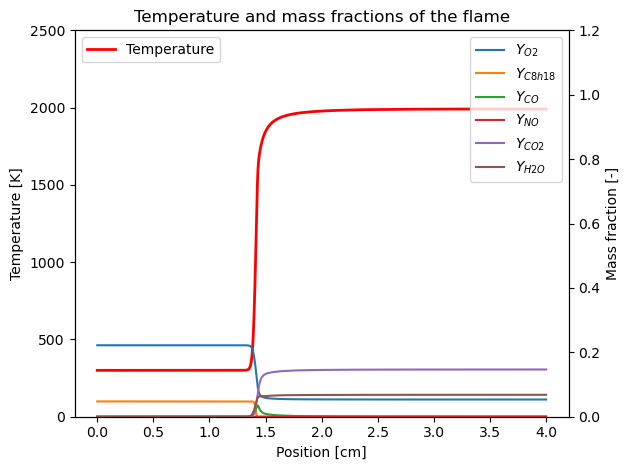

In [4]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Position [cm]')
ax1.set_ylabel('Temperature [K]')
ax1.plot(flame.flame.grid*100, flame.T, label='Temperature', color='r', lw=2)
ax1.tick_params(axis='y')
ax1.legend(loc=2)
ax1.set_ylim(0,2500)

ax2 = ax1.twinx()
ax2.set_ylabel('Mass fraction [-]')
ax2.plot(flame.flame.grid*100, flame.Y[nO2], label=r'$Y_{O2}$')
ax2.plot(flame.flame.grid*100, flame.Y[nFuel], label=r'$Y_{C8h18}$')
ax2.plot(flame.flame.grid*100, flame.Y[nCO], label=r'$Y_{CO}$')
ax2.plot(flame.flame.grid*100, flame.Y[nNO], label=r'$Y_{NO}$')
ax2.plot(flame.flame.grid*100, flame.Y[nCO2], label=r'$Y_{CO2}$')
ax2.plot(flame.flame.grid*100, flame.Y[nH2O], label=r'$Y_{H2O}$')
ax2.tick_params(axis='y')
ax2.legend()
ax2.set_ylim(0,1.2)

plt.title('Temperature and mass fractions of the flame')
plt.show()

In [5]:
def timescale(flame):
    x1 = flame.grid[1:]
    x2 = flame.grid[:-1]
    k = (x1-x2)/flame.velocity[:-1]
    t1 = np.append(0,k)
    time_scale = np.cumsum(t1)
    heat_release = flame.heat_release_rate
    max_heat_release_idx = np.argmax(heat_release)

    time_scale = time_scale -time_scale[max_heat_release_idx]
    t = time_scale
    
    return t

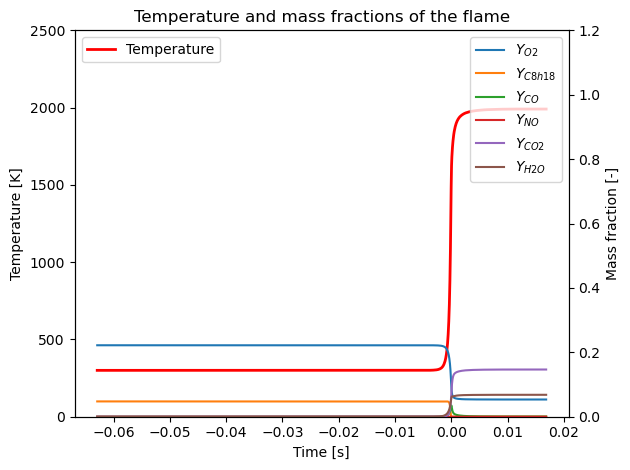

In [6]:
time_scale = timescale(flame)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Temperature [K]')
ax1.plot(time_scale, flame.T, label='Temperature', color='r', lw=2)
ax1.tick_params(axis='y')
ax1.legend(loc=2)
ax1.set_ylim(0,2500)

ax2 = ax1.twinx()
ax2.set_ylabel('Mass fraction [-]')
ax2.plot(time_scale, flame.Y[nO2], label=r'$Y_{O2}$')
ax2.plot(time_scale, flame.Y[nFuel], label=r'$Y_{C8h18}$')
ax2.plot(time_scale, flame.Y[nCO], label=r'$Y_{CO}$')
ax2.plot(time_scale, flame.Y[nNO], label=r'$Y_{NO}$')
ax2.plot(time_scale, flame.Y[nCO2], label=r'$Y_{CO2}$')
ax2.plot(time_scale, flame.Y[nH2O], label=r'$Y_{H2O}$')
ax2.tick_params(axis='y')
ax2.legend(loc=0)
ax2.set_ylim(0,1.2)

plt.title('Temperature and mass fractions of the flame')
plt.show()

Velocity and Heat Realease Rate

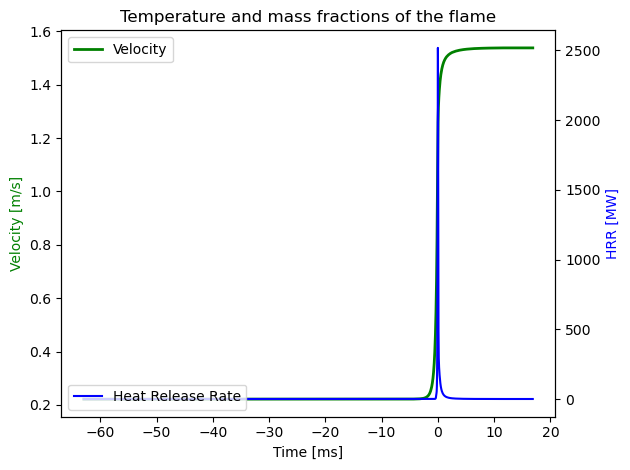

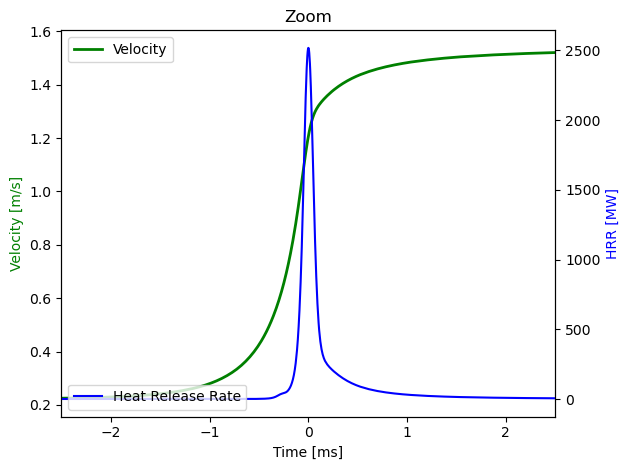

In [7]:
time_scale = timescale(flame)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Time [ms]')
ax1.set_ylabel('Velocity [m/s]', color='g')
ax1.plot(time_scale*1e3, flame.velocity, label='Velocity', color='g', lw=2)
ax1.tick_params(axis='y')
ax1.legend(loc=2)


ax2 = ax1.twinx()
ax2.set_ylabel('HRR [MW]', color='b')
ax2.plot(time_scale*1e3, flame.heat_release_rate*1e-6, label='Heat Release Rate', color='b')

ax2.tick_params(axis='y')
ax2.legend(loc=3)

plt.title('Temperature and mass fractions of the flame')
plt.show()
########
#ZOOM
########
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time [ms]')
ax1.set_ylabel('Velocity [m/s]', color='g')
ax1.plot(time_scale*1e3, flame.velocity, label='Velocity', color='g', lw=2)
ax1.tick_params(axis='y')
ax1.legend(loc=2)
ax1.set_xlim(-2.5,2.5)

ax2 = ax1.twinx()
ax2.set_ylabel('HRR [MW]', color='b')
ax2.plot(time_scale*1e3, flame.heat_release_rate*1e-6, label='Heat Release Rate', color='b')

ax2.tick_params(axis='y')
ax2.legend(loc=3)

plt.title('Zoom')
plt.show()


Température et HRR

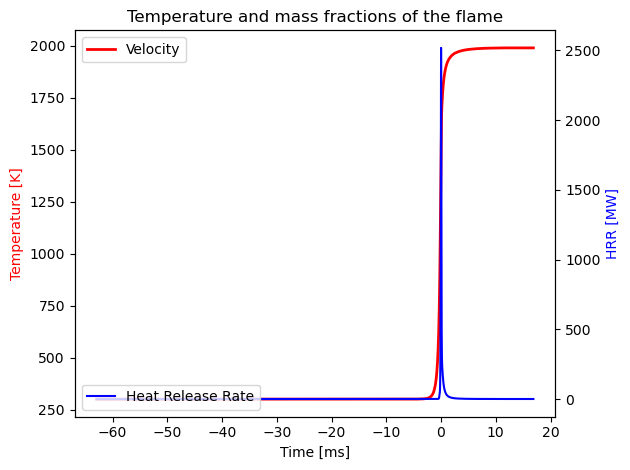

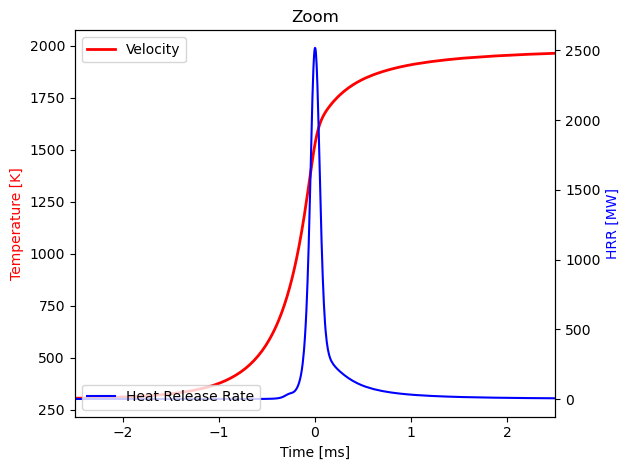

In [8]:
time_scale = timescale(flame)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Time [ms]')
ax1.set_ylabel('Temperature [K]', color='r')
ax1.plot(time_scale*1e3, flame.T, label='Velocity', color='r', lw=2)
ax1.tick_params(axis='y')
ax1.legend(loc=2)


ax2 = ax1.twinx()
ax2.set_ylabel('HRR [MW]', color='b')
ax2.plot(time_scale*1e3, flame.heat_release_rate*1e-6, label='Heat Release Rate', color='b')

ax2.tick_params(axis='y')
ax2.legend(loc=3)

plt.title('Temperature and mass fractions of the flame')
plt.show()
########
#ZOOM
########
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time [ms]')
ax1.set_ylabel('Temperature [K]', color='r')
ax1.plot(time_scale*1e3, flame.T, label='Velocity', color='r', lw=2)
ax1.tick_params(axis='y')
ax1.legend(loc=2)
ax1.set_xlim(-2.5,2.5)

ax2 = ax1.twinx()
ax2.set_ylabel('HRR [MW]', color='b')
ax2.plot(time_scale*1e3, flame.heat_release_rate*1e-6, label='Heat Release Rate', color='b')

ax2.tick_params(axis='y')
ax2.legend(loc=3)

plt.title('Zoom')
plt.show()

Species Net production rate

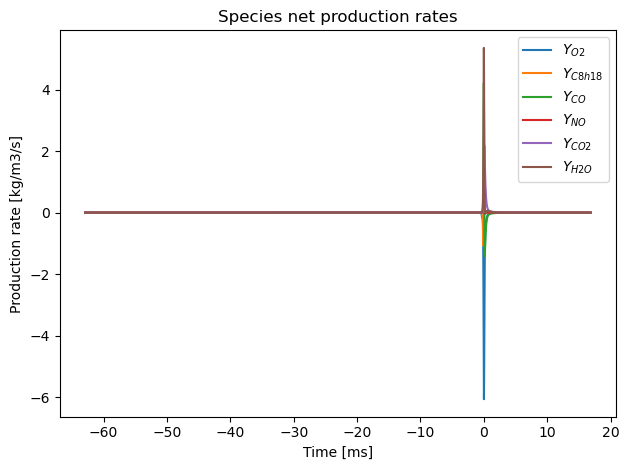

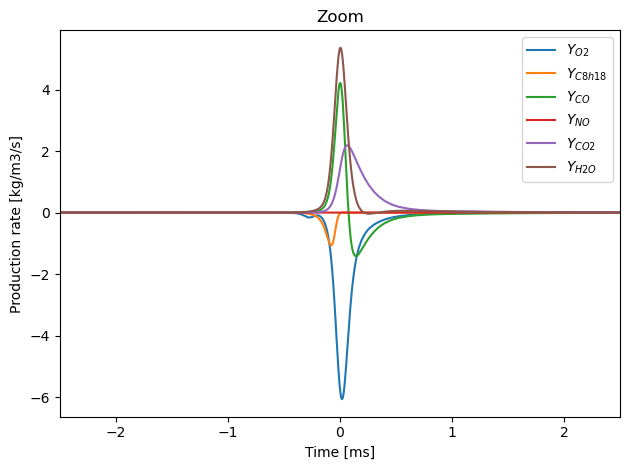

In [9]:
prod_rate_Fuel = flame.net_production_rates[nFuel]
prod_rate_O2 = flame.net_production_rates[nO2]
prod_rate_CO = flame.net_production_rates[nCO]
prod_rate_NO = flame.net_production_rates[nNO]
prod_rate_CO2 = flame.net_production_rates[nCO2]
prod_rate_H2O = flame.net_production_rates[nH2O]

plt.figure()
plt.ylabel('Production rate [kg/m3/s]')
plt.xlabel('Time [ms]')
plt.plot(time_scale*1e3, prod_rate_O2, label=r'$Y_{O2}$')
plt.plot(time_scale*1e3, prod_rate_Fuel, label=r'$Y_{C8h18}$')
plt.plot(time_scale*1e3, prod_rate_CO, label=r'$Y_{CO}$')
plt.plot(time_scale*1e3, prod_rate_NO, label=r'$Y_{NO}$')
plt.plot(time_scale*1e3, prod_rate_CO2, label=r'$Y_{CO2}$')
plt.plot(time_scale*1e3, prod_rate_H2O, label=r'$Y_{H2O}$')
plt.tick_params(axis='y')
plt.legend()

plt.title('Species net production rates')
plt.show()

########
#ZOOM
########
plt.figure()
plt.ylabel('Production rate [kg/m3/s]')
plt.xlabel('Time [ms]')
plt.plot(time_scale*1e3, prod_rate_O2, label=r'$Y_{O2}$')
plt.plot(time_scale*1e3, prod_rate_Fuel, label=r'$Y_{C8h18}$')
plt.plot(time_scale*1e3, prod_rate_CO, label=r'$Y_{CO}$')
plt.plot(time_scale*1e3, prod_rate_NO, label=r'$Y_{NO}$')
plt.plot(time_scale*1e3, prod_rate_CO2, label=r'$Y_{CO2}$')
plt.plot(time_scale*1e3, prod_rate_H2O, label=r'$Y_{H2O}$')
plt.tick_params(axis='y')
plt.legend()
plt.xlim(-2.5,2.5)

plt.title('Zoom')
plt.show()

Variation phi

In [10]:
Vec_phi = [0.60,0.65,0.70]
Vec_T = []
Vec_NO = []
Vec_CO = []
Vec_Grid = []
Vec_Timescale = []

for phi in Vec_phi:
    To = 300
    Po = ct.one_atm

    # Define the gas-mixutre and kinetics
    # In this case, we are choosing a GRI3.0 gas
    gasphi = ct.Solution("Jerzembeck.yaml")

    # Create a stoichiometric CH4/Air premixed mixture
    gasphi.set_equivalence_ratio(phi, "IXC8H18", {"O2": 1.0, "N2": 3.76})
    gasphi.TP = To, Po

    # Domain width in metres
    width = 2/100

    # Create the flame object
    flamephi = ct.FreeFlame(gasphi, width=width)

    # Define tolerances for the solver
    flamephi.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)

    # Define logging level
    loglevel = 1

    flamephi.solve(loglevel=loglevel, auto=True)
    Su0phi = flamephi.velocity[0]
    print(f"Flame Speed is: {Su0 * 100:.2f} cm/s")

    nCO = gasphi.species_index('CO')
    nNO = gasphi.species_index('NO')

    Vec_T.append(flamephi.T)
    Vec_NO.append(flamephi.Y[nNO])
    Vec_CO.append(flamephi.Y[nCO])
    Vec_Grid.append(flamephi.grid)
    Vec_Timescale.append(timescale(flamephi))
  


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.543e-05       4.77
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00146      3.969
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01663      3.148
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1894     0.9311
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accommodate flame thickness. New width: 0.04 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 7 
    to resolve AXC5H10 C2H C2H2 C2H3 C2H3CHO C2H3CO C2H4 C2H5 C2H5O2 C2H6 C3H2 C3H

KeyboardInterrupt: 

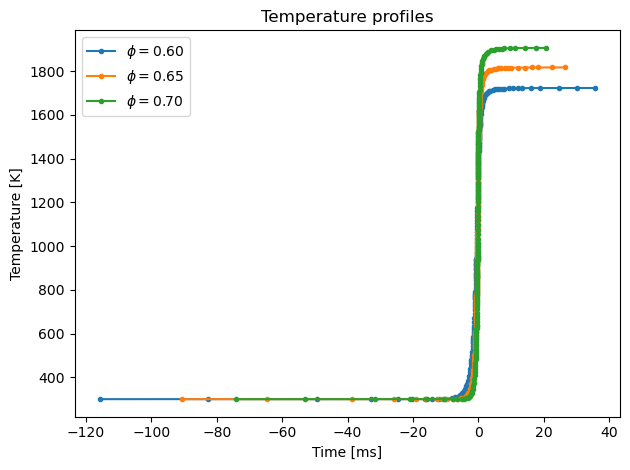

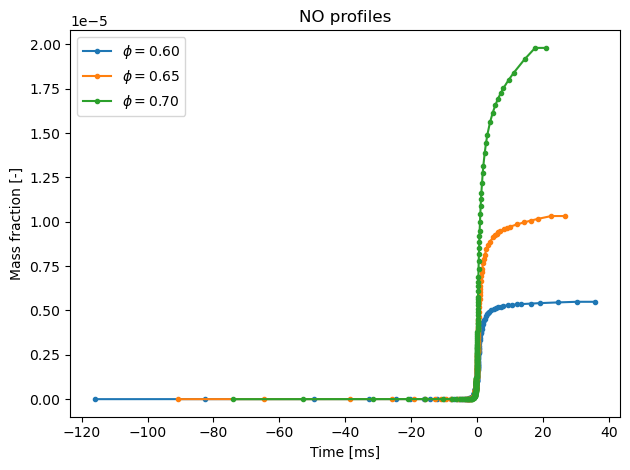

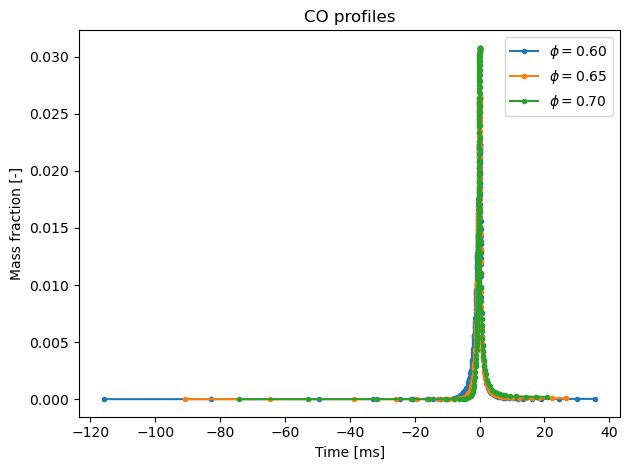

In [ ]:
plt.figure()
plt.ylabel('Temperature [K]')
plt.xlabel('Time [ms]')
plt.plot(Vec_Timescale[0]*1000, Vec_T[0], '-',label=r'$\phi=0.60$')
plt.plot(Vec_Timescale[1]*1000, Vec_T[1], '-',label=r'$\phi=0.65$')
plt.plot(Vec_Timescale[2]*1000, Vec_T[2], '-',label=r'$\phi=0.70$')
plt.tick_params(axis='y')
plt.legend()

plt.title('Temperature profiles')
plt.show()

plt.figure()
plt.ylabel('Mass fraction [-]')
plt.xlabel('Time [ms]')
plt.plot(Vec_Timescale[0]*1000, Vec_NO[0], '-',label=r'$\phi=0.60$')
plt.plot(Vec_Timescale[1]*1000, Vec_NO[1], '-',label=r'$\phi=0.65$')
plt.plot(Vec_Timescale[2]*1000, Vec_NO[2], '-',label=r'$\phi=0.70$')
plt.tick_params(axis='y')
plt.legend()

plt.title('NO profiles')
plt.show()

plt.figure()
plt.ylabel('Mass fraction [-]')
plt.xlabel('Time [ms]')
plt.plot(Vec_Timescale[0]*1000, Vec_CO[0], '-',label=r'$\phi=0.60$')
plt.plot(Vec_Timescale[1]*1000, Vec_CO[1], '-',label=r'$\phi=0.65$')
plt.plot(Vec_Timescale[2]*1000, Vec_CO[2], '-',label=r'$\phi=0.70$')
plt.tick_params(axis='y')
plt.legend()

plt.title('CO profiles')
plt.show()


Variation phi

In [21]:
Vec_Phi_FS = np.arange(0.5,1.6,0.1)
Vec_FS = []

for phifs in Vec_Phi_FS:
    To = 300
    Po = ct.one_atm

    # Define the gas-mixutre and kinetics
    # In this case, we are choosing a GRI3.0 gas
    gasphifs = ct.Solution("Ethanol.yaml")

    # Create a stoichiometric CH4/Air premixed mixture
    gasphifs.set_equivalence_ratio(phifs, "C2H5OH", {"O2": 1.0, "N2": 3.76})
    gasphifs.TP = To, Po

    # Domain width in metres
    width = 2/100

    # Create the flame object
    flamephifs = ct.FreeFlame(gasphifs, width=width)

    # Define tolerances for the solver
    flamephifs.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)

    # Define logging level
    loglevel = 1

    flamephifs.solve(loglevel=loglevel, auto=True)
    Su0phifs = flamephifs.velocity[0]
    print(f"Flame Speed is: {Su0phifs * 100:.2f} cm/s")
    Vec_FS.append(Su0phifs)


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001139      4.387
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002919      3.728
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.03325       2.39
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accommodate flame thickness. New width: 0.04 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 7 
    to resolve C2H2 C2H3 C2H4 C2H4O1-2 C2H5O2 C2H5O2H C2H5OH C2H6 CH2 CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3CO3 CH3NO2 CH3O CH3O2 CH3O2H CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCO HO2 HOCHO N2

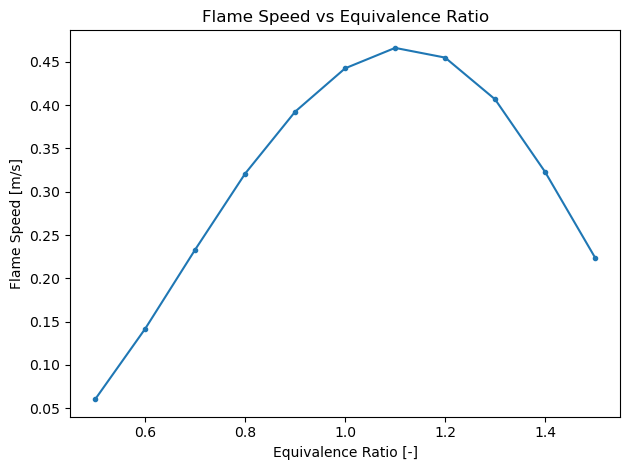

In [22]:
plt.figure()
plt.ylabel('Flame Speed [m/s]')
plt.xlabel('Equivalence Ratio [-]')
plt.plot(Vec_Phi_FS, Vec_FS, '.-')
plt.tick_params(axis='y')

plt.title('Flame Speed vs Equivalence Ratio')
plt.show()

Pressure

In [23]:
Vec_P = [1,2,4,8,16]
Vec_FS_P = []
Vec_HeatConduc = []
Vec_density = []
Vec_cp = []

for P in Vec_P:
    To = 600

    # Define the gas-mixutre and kinetics
    # In this case, we are choosing a GRI3.0 gas
    gasP = ct.Solution("Ethanol.yaml")

    # Create a stoichiometric CH4/Air premixed mixture
    gasP.set_equivalence_ratio(0.6, "C2H5OH", {"O2": 1.0, "N2": 3.76})
    gasP.TP = To, P*ct.one_atm

    # Domain width in metres
    width = 2/100

    # Create the flame object
    flameP = ct.FreeFlame(gasP, width=width)

    # Define tolerances for the solver
    flameP.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)

    # Define logging level
    loglevel = 1

    flameP.solve(loglevel=loglevel, auto=True)
    Su0P = flameP.velocity[0]
    Vec_FS_P.append(Su0P)
    Vec_HeatConduc.append(flameP.thermal_conductivity[0])
    Vec_density.append(flameP.density[0])
    Vec_cp.append(flameP.cp[0])


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001139      5.395
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.014e-05      6.476
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002598      4.217
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.009987      2.599
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).
Expanding domain to accommodate flame thickness. New width: 0.04 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 6 
    to resolve C2H2 C2H3 C2H4 C2H4O1-2 C2H5 C2H5O2 C2H5O2H C2H5OH C2H6 CH CH2 CH2(S)

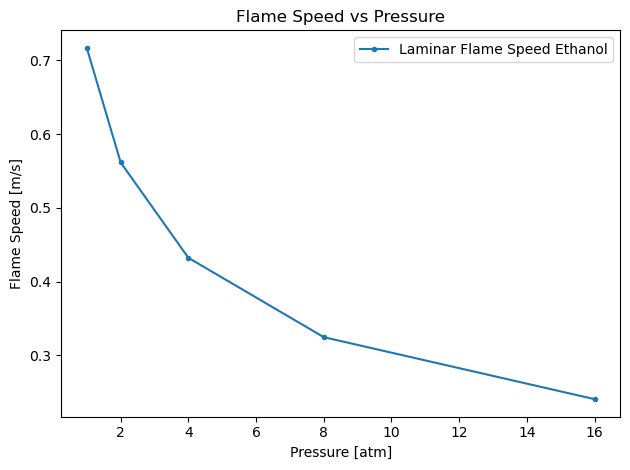

In [24]:
plt.plot(Vec_P, Vec_FS_P, '.-',label=r'Laminar Flame Speed Ethanol')
plt.ylabel('Flame Speed [m/s]')
plt.xlabel('Pressure [atm]')
plt.tick_params(axis='y')
plt.legend()

plt.title('Flame Speed vs Pressure')
plt.show()

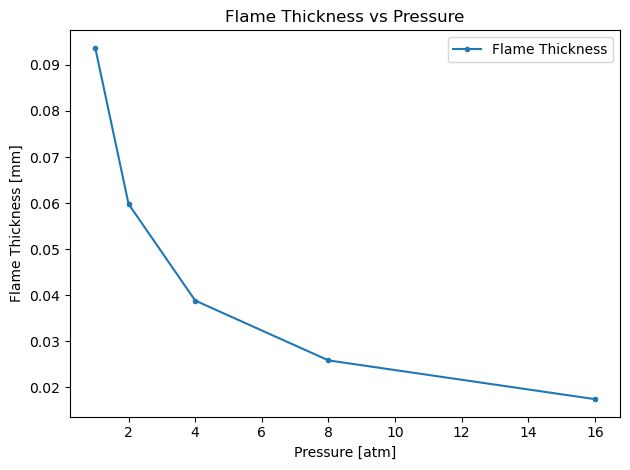

In [25]:
laminarburningflux = np.array(Vec_FS_P)*np.array(Vec_density)

FlameThickness = np.array(Vec_HeatConduc)/(laminarburningflux*np.array(Vec_cp))

plt.plot(Vec_P, FlameThickness*1e3, '.-',label=r'Flame Thickness')
plt.ylabel('Flame Thickness [mm]')
plt.xlabel('Pressure [atm]')
plt.tick_params(axis='y')
plt.legend()

plt.title('Flame Thickness vs Pressure')
plt.show()


In [26]:
FS_isooctane = [0.5814661080458532,0.4931356159457799,0.41431664928999895,0.3374525627877814,0.26288125105755633]

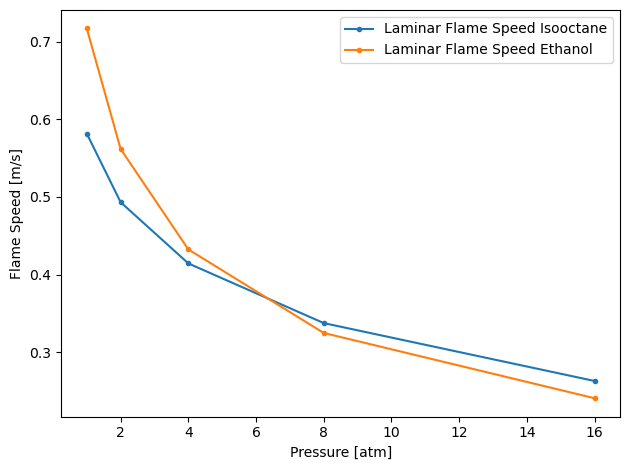

In [27]:
plt.plot(Vec_P, FS_isooctane, '.-',label=r'Laminar Flame Speed Isooctane')
plt.plot(Vec_P, Vec_FS_P, '.-',label=r'Laminar Flame Speed Ethanol')

plt.ylabel('Flame Speed [m/s]')
plt.xlabel('Pressure [atm]')
plt.tick_params(axis='y')
plt.legend()

